# Studi Perbandingan Paket Prabayar: Surf vs. Ultimate di Perusahaan Megaline

Sebagai seorang analis di perusahaan operator telekomunikasi bernama `Megaline`. Perusahaan tersebut menawarkan kliennya dua jenis paket prabayar, yaitu `paket Surf dan paket Ultimate`. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Kita akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda memiliki `500 data klien Megaline`, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas kita adalah untuk menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan.

## Tujuan Proyek
1. Menentukan Paket Prabayar mana yang Lebih Menguntungkan

## Hipotesis
1. Apakah benar rata-rata pendapatan dari pengguna `paket telepon Ultimate dan Surf` berbeda?
2. Apakah rata-rata pendapatan dari pengguna di `wilayah NY-NJ` berbeda dengan pendapatan pengguna dari `wilayah lain`?

# Konten <a id='back'></a>

* [1.Studi Perbandingan Paket Prabayar: Surf vs. Ultimate di Perusahaan Megaline](#intro)
    * [1.1 Tujuan Proyek](#cont_1)
    * [1.2 Hipotesis](#cont_2)
* [2. Konten](#cont_3)
    * [2.1 Inisialisasi](#cont_4)
    * [2.2 Memuat Data](#cont_8)
    * [2.3 Mempersiapkan Data](#cont_14)
    * [2.4 Users](#cont_15)
      * [2.4.1 Memperbaiki Data](#cont_15)
      * [2.4.2 Memperkaya Kualitas Data](#cont_15)
    * [2.5 Plans](#cont_20)
    * [2.6 Calls](#cont_22)
      * [2.6.1 Memperbaiki Data](#cont_25)
      * [2.6.2 Memperkaya Kualitas Data](#cont_26)   
    * [2.7 Messages](#cont_23)
      * [2.7.1 Memperbaiki Data](#cont_25)
      * [2.7.2 Memperkaya Kualitas Data](#cont_26)   
    * [2.8 Internet](#cont_24)
      * [2.8.1 Memperbaiki Data](#cont_25)
      * [2.8.2 Memperkaya Kualitas Data](#cont_26)
    * [2.9 Mempelajari Syarat dan Kondisi Terkait Paket Prabayar](#cont_26)
    * [2.10 Mengagregasi Data per Pengguna](#cont_26)
    * [2.11 Mempelajari Perilaku Pengguna](#cont_26)
      * [2.11.1 Panggilan](#cont_26)
      * [2.11.2 Pesan/SMS](#cont_26)
      * [2.11.3 Internet](#cont_26)
    * [2.12 Pendapatan](#cont_26)
    * [2.13 Menguji Hipotesis Statistik](#cont_26)
      * [2.13.1 Pengujian Hipotesis 1: Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda](#cont_26)
      * [2.13.2 Pengujian Hipotesis 2: Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ Berbeda dengan Pendapatan Pengguna dari Wilayah Lain](#cont_26)
    * [2.14 Kesimpulan Umum](#cont_26)

## Inisialisasi

Kita akan menggunakan beberapa library untuk menganalisa data saat ini yaitu `pandas`, `numpy`, `matplotlib`, `seaborn`, `math`, dan `scipy`.

In [1]:
# Muat semua library

import pandas as pd # memproses dataframe
import numpy as np # memproses statistik deskriptif
import matplotlib.pyplot as plt # memvisualisasikan data
import seaborn as sns # memvisualisasikan data
import math as mt # menambahkan fungsi matematika
from scipy import stats as st # memproses hipotesis

## Memuat Data

Megaline membagi data kedalam beberapa frame yaitu `calls`, `internet`, `messages`, `plans`, dan `users`, mari kita muat datanya terlebih dahulu.

In [2]:
# Muat file data ke dalam DataFrame yang berbeda
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Mempersiapkan Data

Selanjutnya kita cek terlebih dahulu apakah ada `data yang hilang` pada setiap file data.

Cek data yang hilang pada `calls`

In [3]:
# Melakukan pengecekan apakah ada nilai yang hilang pada dataset
calls_missed = calls.isna().sum().to_frame()
calls_missed = calls_missed.rename(columns={0: 'missing_values'})
calls_missed['% of total'] = (calls_missed['missing_values'] / calls.shape[0]).round(2)
calls_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
id,0,0.0
user_id,0,0.0
call_date,0,0.0
duration,0,0.0


Tidak ada data yang hilang pada `calls`

Cek data yang hilang pada `internet`

In [4]:
# Melakukan pengecekan apakah ada nilai yang hilang pada dataset
internet_missed = internet.isna().sum().to_frame()
internet_missed = internet_missed.rename(columns={0: 'missing_values'})
internet_missed['% of total'] = (internet_missed['missing_values'] / internet.shape[0]).round(2)
internet_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
id,0,0.0
user_id,0,0.0
session_date,0,0.0
mb_used,0,0.0


Tidak ada data yang hilang pada `internet`

Cek data yang hilang pada `messages`

In [5]:
# Melakukan pengecekan apakah ada nilai yang hilang pada dataset
messages_missed = messages.isna().sum().to_frame()
messages_missed = messages_missed.rename(columns={0: 'missing_values'})
messages_missed['% of total'] = (messages_missed['missing_values'] / messages.shape[0]).round(2)
messages_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
id,0,0.0
user_id,0,0.0
message_date,0,0.0


Tidak ada yang hilang pada `messages`

Cek data yang hilang pada `plans`

In [6]:
# Melakukan pengecekan apakah ada nilai yang hilang pada dataset
plans_missed = plans.isna().sum().to_frame()
plans_missed = plans_missed.rename(columns={0: 'missing_values'})
plans_missed['% of total'] = (plans_missed['missing_values'] / plans.shape[0]).round(2)
plans_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
messages_included,0,0.0
mb_per_month_included,0,0.0
minutes_included,0,0.0
usd_monthly_pay,0,0.0
usd_per_gb,0,0.0
usd_per_message,0,0.0
usd_per_minute,0,0.0
plan_name,0,0.0


Tidak ada yang hilang pada `plans`

Cek data yang hilang pada `users`

In [7]:
# Melakukan pengecekan apakah ada nilai yang hilang pada dataset
users_missed = users.isna().sum().to_frame()
users_missed = users_missed.rename(columns={0: 'missing_values'})
users_missed['% of total'] = (users_missed['missing_values'] / users.shape[0]).round(2)
users_missed.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
churn_date,466,0.93
user_id,0,0.00
first_name,0,0.00
last_name,0,0.00
age,0,0.00
city,0,0.00
reg_date,0,0.00
plan,0,0.00


Terdapat data yang hilang pada `users`, dan pada kolom `churn_date`. kita akan perbaiki data yang hilang ini pada bab berikutnya.

## Users

Kita akan melanjutkan analisa data dengan semua data yang ada, dan kita mulai dengan `users` dahulu, yang mempunyai data yang hilang.

In [8]:
# Tampilkan informasi/rangkuman umum tentang users
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Dalam type data ada satu tipe data yang salah, yaitu pada `reg_date`. Dimana kita perlu mengubahnya ke type `objek` menjadi `datetime`.

In [9]:
# cek sampel data
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
23,1023,Jack,Delaney,70,"Omaha-Council Bluffs, NE-IA MSA",2018-07-06,surf,NaN
195,1195,Roy,Velez,60,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-09,surf,NaN
353,1353,Emerson,Whitfield,56,"North Port-Sarasota-Bradenton, FL MSA",2018-03-27,surf,NaN
88,1088,Paris,Robertson,64,"Phoenix-Mesa-Chandler, AZ MSA",2018-05-27,ultimate,NaN
275,1275,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaN


In [10]:
# cek duplikat data
users.duplicated().sum()

0

Terbukti bahwa ada data yang hilang pada users, kolom `churn_date`, dan tidak ditemukan data yang duplikat pada `users`. Selanjutnya mari kita rubah tipe data pada `reg_date` dan mengatasai nilai yang hilang pada `churn_date`

### Memperbaiki Data

Kita akan memulai dengan mengubah tipe data pada `reg_date` dari `object` menjadi `datetime`.

Dari sampel data tidak terlihat ada data yang hilang, mari kita cek duplikatnya.

In [11]:
# memperbaiki tipe data yang salah pada kolom 'reg_date'
# merubah tipe data `objek` menjadi `datetime`
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

# menampilkan informasi `users`
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Kita sudah berhasil mengubah tipe data pada `reg_date`. Sekarang kita lanjutkan mengatasi nilai yang hilang pada kolom `churn_date`.

Dikarenakan data yang hilang berarti customer ada kemungkinan belum melakukan churn, maka kita akan biarkan saja data tersebut tetap null. Namun, kita akan rubah formatnya dari `object` menjadi `datetime`.

In [12]:
# Mengubah tipe data `churn_date` menjadi `datetime`
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

# Menampilkan informasi `users`
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [13]:
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
367,1367,Minh,Fischer,18,"Baltimore-Columbia-Towson, MD MSA",2018-07-23,surf,NaT
311,1311,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",2018-06-27,ultimate,NaT
269,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
75,1075,Salena,Bates,35,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-06,surf,NaT
289,1289,Steve,Blair,47,"Detroit-Warren-Dearborn, MI MSA",2018-11-12,ultimate,NaT


Sekarang, `users` hanya mempunyai data yang hilang pada `churn_date` karena kita membiarkan nilai null, yang artinya customer belum melakukan churn, serta kita juga sudah berhasil mengubah tipe datanya.

### Memperkaya Kualitas Data

Untuk mempermudah analisa data, kita akan pisahkan kolom `churn_date`,  berdasarkan `tanggal`, `bulan`, `tahun`. Kemudian dilanjutkan pembuatan kolom region yang berisi apakah kota berasal dari wilayah '`NY-NJ'` atau bukan `'other'`.

In [14]:
# memisahkan kolom datetime

# membuat kolom tanggal
users['date'] = users['reg_date'].dt.day

# membuat kolom bulan
users['month'] = users['reg_date'].dt.month

# membuat kolom tahun
users['year'] = users['reg_date'].dt.year

# menampilkan sampel data
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,date,month,year
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,24,12,2018
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,13,8,2018
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,21,10,2018
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,28,1,2018
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,23,5,2018


In [15]:
# membuat kolom untuk memisahkan region NY-NJ dari region lain
# mengecek nilai unik pada kolom `city`
users['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [16]:
# membuat kolom region NY-NJ

# membuat fungsi pengecekan apakah berasal dari region `NY-NJ` atau bukan
def split_region(data):
    if ('NY-NJ' in data)|(data == 'NY')|(data == 'NJ'):
        return 'NY-NJ'
    else:
        return 'other'

# membuat kolom region menggunakan fungsi yang sudah dibuat
users['region'] = users['city'].apply(split_region)

# menampilkan value_counts dari kolom `region`
users['region'].value_counts()

other    420
NY-NJ     80
Name: region, dtype: int64

In [17]:
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,date,month,year,region
415,1415,Rosette,Mendez,56,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-27,surf,NaT,27,2,2018,other
311,1311,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",2018-06-27,ultimate,NaT,27,6,2018,other
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaT,16,6,2018,other
181,1181,Ron,Kaufman,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-13,surf,NaT,13,4,2018,NY-NJ
401,1401,Charmain,Bryant,67,"Richmond, VA MSA",2018-08-24,ultimate,NaT,24,8,2018,other
339,1339,Mariette,Mclean,27,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-03-03,surf,NaT,3,3,2018,other
478,1478,Elane,David,51,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-28,ultimate,NaT,28,6,2018,other
417,1417,Jorge,Madden,51,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-06-22,ultimate,NaT,22,6,2018,other
449,1449,Boyd,Kelley,39,"Seattle-Tacoma-Bellevue, WA MSA",2018-10-04,surf,NaT,4,10,2018,other
319,1319,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaT,17,6,2018,other


Sekarang kita sudah berhasil menambahkan kolom-kolom yang kita inginkan, kita lanjutkan ke data selanjutnya.

## Plans

Kita lanjutkan dengan mengecek data pada `Plans`

In [18]:
# Cek info type data pada plans
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [19]:
# Cek sampel data pada plans
plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


In [20]:
# Cek data duplikat pada plans
plans.duplicated().sum()

0

Pada data `Plans` tidak terdapat kesalahan pada tipe data dan tidak ada data duplikat. Mari kita lanjutkan ke data selanjutnya.

## Calls

Kita lanjutkan dengan mengecek data pada `Calls`.

In [21]:
# Cek type data dari Calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [22]:
# Cek sampel data dari Calls
calls.sample(5)

,id,user_id,call_date,duration
13062,1056_205,1056,2018-11-19,0.00
16832,1065_200,1065,2018-10-11,5.51
122643,1433_214,1433,2018-11-15,14.90
28291,1106_758,1106,2018-07-14,0.00
57232,1203_623,1203,2018-10-18,3.85


In [23]:
# Cek duplikat data dari calls
calls.duplicated().sum()

0

Dari pengecekan tidak ditemukan adanya data duplikat pada `Calls`. Namun, kita perlu mengubah tipe data pada kolom `call_date` dari `object` menjadi `datetime`.

### Memperbaiki Data

Mengubah tipe data pada kolom call_date dari `object` menjadi `datetime`.

In [24]:
# Mengubah tipe data pada kolom call date
calls['call_date']= pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

#cek tipe data kembali 
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


Kita sudah berhasil mengubah tipe data pada `call_date` dari `object` menjadi `datetime`.


### Memperkaya Kualitas Data

Untuk mempermudah analia, kita akan menambahkan beberapa kolom dari `call_date`, dengan memisahkan `tanggal`, `bulan`, dan `tahun`.

In [25]:
# membuat kolom tambahan

# membuat kolom tanggal
calls['date'] = calls['call_date'].dt.day

# membuat kolom bulan
calls['month'] = calls['call_date'].dt.month

# membuat kolom tahun
calls['year'] = calls['call_date'].dt.year

# cek sampel data
calls.sample(5)


,id,user_id,call_date,duration,date,month,year
120022,1417_832,1417,2018-07-25,0.00,25,7,2018
107942,1382_897,1382,2018-10-02,8.87,2,10,2018
132538,1477_94,1477,2018-12-25,5.97,25,12,2018
111779,1392_189,1392,2018-08-27,15.59,27,8,2018
49208,1178_112,1178,2018-10-17,8.91,17,10,2018


Penambhan kolom berhasil kita tambahkan. Mari kita lanjutkan data selanjutnya.

## Messages

Kita lanjutkan pada data `messages`

In [26]:
# Cek tipe data pada messages
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [27]:
# Cek sampel data
messages.sample(5)

,id,user_id,message_date
33464,1211_140,1211,2018-10-10
64070,1408_195,1408,2018-04-03
61393,1384_512,1384,2018-07-13
73774,1474_98,1474,2018-09-12
47518,1324_233,1324,2018-07-16


In [28]:
# Cek duplikat data
messages.duplicated().sum()

0

Dari pengecekan data, tidak ditemukan data yang duplikat, namun kita perlu mengubah type data dari `message_date` dari `object` menjadi `datetime`.

### Memperbaiki Data

Mengubah type data dari `message_date` dari `object` menjadi `datetime`.

In [29]:
# Mengubah tipe data pada kolom message_date
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

# Cek kembali type data
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Kita sudah berhasil mengubah tipe data `message_date` dari `object` menjadi `datetime`.

### Memperkaya Kualitas Data

Untuk mempermudah analisa, kita akan menambahkan beberapa kolom tambahan dari `message_date`, dengan memisahkan `tanggal`, `bulan`, dan `tahun`.

In [30]:
# Membuat kolom tambahan

# Membuat kolom tanggal
messages['date'] = messages['message_date'].dt.day

# Membuat kolom bulan
messages['month'] = messages['message_date'].dt.month

# Membuat kolom tahun
messages['year'] = messages['message_date'].dt.year

# Cek kembali sampel data
messages.sample(5)

,id,user_id,message_date,date,month,year
38479,1253_13,1253,2018-09-01,1,9,2018
66415,1433_355,1433,2018-10-21,21,10,2018
18665,1120_530,1120,2018-06-11,11,6,2018
51280,1333_19,1333,2018-12-05,5,12,2018
28897,1176_38,1176,2018-11-27,27,11,2018


Kita sudah berhasil membuat kolom tambahan. Mari kita lanjutkan ke data terakhir selanjutnya.

## Internet

Kita lanjutkan pada data `internet`.

In [31]:
# Cek tipe info data
internet.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [32]:
# Cek sampel data
internet.sample(5)

,id,user_id,session_date,mb_used
49285,1220_307,1220,2018-08-02,490.40
40281,1181_483,1181,2018-07-14,365.82
18586,1082_332,1082,2018-07-15,0.00
89693,1414_149,1414,2018-10-08,75.69
53497,1240_469,1240,2018-10-15,560.79


In [33]:
# Cek duplikat data
internet.duplicated().sum()



0

 Dari pengecekan data, tidak ditemukan data duplikat pada data `intenet`, namun kita perlu mengubah tipe data pada kolom `session_date` dari `object` menjadi `datetime`.

### Memperbaiki Data

Mengubah tipe data pada kolom `session_date` dari `object` menjadi `datetime`.

In [34]:
# Mengubah tipe data
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

# Cek tipe data kembali
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Kita telah berhasil mengubah tipe data `session_date` dari `object` menjadi `datetime`.

### Memperkaya Kualitas Data

Untuk mempermudah analisa data, kita akan menambahkan kolom, dari kolom `session_date`, dengan memisahkan `tanggal`, `bulan`, dan `tahun`.

In [35]:
# Membuat kolom tambahan

# Membuat kolom tanggal
internet['date'] = internet['session_date'].dt.day

# Membuat kolom bulan
internet['month'] = internet['session_date'].dt.month

# Membuat kolom tahun
internet['year'] = internet['session_date'].dt.year

# Meengecek sampel data
internet.sample(5)

,id,user_id,session_date,mb_used,date,month,year
41324,1185_361,1185,2018-06-08,722.58,8,6,2018
68420,1320_84,1320,2018-11-28,665.86,28,11,2018
35122,1158_160,1158,2018-12-05,297.05,5,12,2018
10819,1054_355,1054,2018-10-14,98.80,14,10,2018
26665,1123_160,1123,2018-08-29,48.07,29,8,2018


Kita telah berhasil menambahkan kolom tambahan.

## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

Mari kita cek kembali, syarat dan kondisi paket prabayar dari data `plans`. Kita tampilkan ulang kembali datanya.

In [36]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Dari data di atas, kita dapat mengambil kesimpulan bahwa:
1. Paket terdiri dari dua paket, yaitu `surf` dan `ultimate
2. Masing-masing paket memilki fasilitas yang tersedia saat kita membeli paket tersebut dan jika fasilitas tersebut habis maka akan dikenakan `biaya tambahan` yang dihitung berdasarkan `biaya unit pemakaian dikalikan dengan jumlah penggunaan`.
3. Beberapa fasilitas dan jumlah yang disediakan ketika kita memilih paket prabayar tercantum pada `kolom messages_included, mb_per_month_included dan minutes_included`.
4. Biaya paket bulanan tercantum dalam `kolom usd_monthly_pay`.
5. Biaya tambahan yang dikenakan jika fasilitas utama telah habis digunakan berdasarkan kategorinya dengan mengalikan jumlah penggunaan kategori dengan unit satuan kategori yang dikenakan tercantum dalam `kolom usd_per_gb, usd_per_message dan usd_per_minute`.



## Mengagregasi Data per Pengguna

Setelah melewati data `pre-processing` di atas. Maka kita akan melanjutkan analisa yang lebih lanjut dengan mengagregasi data, dengan beberapa langkah berikut:

1. Agregasi data menggunakan dataframe dari `user_id` meliputi jumlah yang dilakukan pengguna selama tahun 2018.
2. Memisahkan jumlah dari setiap-setiap data yang ada per bulan.
3. Menggabungkan data-data ynag sudah dikumpulkan untuk dapat mengetahui pemndapatan bulanan untuk setiap pengguna.


In [37]:
# Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan.

# membuat pivot_table untuk jumlah panggilan yang dilakukan pengguna di tahun 2018
call_count = pd.pivot_table(calls, index = 'user_id', values = 'call_date', aggfunc = 'count').reset_index()

# membuat fungsi untuk menghitung jumlah bulan-bulan yang aktif per pengguna
def month_calls(user):
    slicer = calls.query('user_id == @user')
    total = len(slicer['month'].unique())
    return total

# menerapkan fungsi menghitung jumlah bulan-bulan yang aktif setiap pengguna ke dalam kolom baru
call_count['call_month'] = call_count['user_id'].apply(month_calls)

# menghitung jumlah panggilan pengguna selama satu bulan
call_count['call_per_month'] = call_count['call_date']/call_count['call_month']

# membulatkan jumlah panggilan pengguna selama satu bulan
call_count['call_per_month'] = call_count['call_per_month'].apply(lambda x: mt.ceil(x))

# mengubah nama kolom `call_date` menjadi nama kolom `count_call`
call_count.rename(columns={'call_date':'count_call'},inplace=True)

# menjadikan kolom `user_id` sebagai index
call_count.set_index('user_id',inplace = True)

# menampilkan sampel data
call_count.head()

,count_call,call_month,call_per_month
user_id,,,
1000,16,1,16
1001,261,5,53
1002,113,3,38
1003,149,1,149
1004,370,8,47


In [38]:
# Gabung tabel durasi dan jumlah panggilan per bulan
pivot_calls = calls.pivot_table(index=['user_id', 'month'], values=['duration'], aggfunc=['sum', 'count']).reset_index()

# Ubah nama kolom
pivot_calls.columns = ['user_id', 'month', 'sum_duration', 'count_calls']

# Menampilkan sampel data
pivot_calls.head()

,user_id,month,sum_duration,count_calls
0,1000,12,116.83,16
1,1001,8,171.14,27
2,1001,9,297.69,49
3,1001,10,374.11,65
4,1001,11,404.59,64


In [39]:
# Membuat pivot_table untuk jumlah SMS yang dikirim pengguna per bulan
pivot_msg = messages.pivot_table(index=['user_id', 'month'], values=['id'], aggfunc='count').reset_index()

# Ubah nama kolom
pivot_msg.columns = ['user_id', 'month', 'count_sms']

# Menampilkan sampel data
pivot_msg.head()

,user_id,month,count_sms
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [40]:
# Membuat pivot_table untuk jumlah data internet yang digunakan pengguna per bulan
pivot_internet = internet.pivot_table(index=['user_id', 'month'], values=['mb_used'], aggfunc='sum').reset_index()

# Ubah nama kolom
pivot_internet.columns = ['user_id', 'month', 'total_mb_used']

# Menampilkan sampel data
pivot_internet.head()


,user_id,month,total_mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


Setelah proses agregasi, selanjutnya kita lakukan data yang sudah di agregasi menjadi satu dataframe, untuk memudahkan analisa lanjutan.

In [76]:
merged_data

,user_id,month,sum_duration,count_calls,count_sms,total_mb_used
0,1000,12,116.83,16.0,11.0,1901.47
1,1001,8,171.14,27.0,30.0,6919.15
2,1001,9,297.69,49.0,44.0,13314.82
3,1001,10,374.11,65.0,53.0,22330.49
4,1001,11,404.59,64.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91
2289,1361,5,NaN,NaN,2.0,1519.69
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,233.17


In [41]:
# Menggabungkan data panggilan, pesan SMS, dan penggunaan internet berdasarkan user_id dan month (bulan)
merged_data = pivot_calls.merge(pivot_msg, on=['user_id', 'month'], how='outer').merge(pivot_internet, on=['user_id', 'month'], how='outer')

# Memeriksa apakah kolom 'user_id' adalah bagian dari indeks di dataframe 'users'
if 'user_id' in users.index.names:
    # Jika iya, reset indeks agar 'user_id' tidak menjadi indeks
    users.reset_index(inplace=True)
    
# Menggabungkan data pengguna (users) dengan data yang telah digabungkan di atas
user_usage = users[['user_id', 'region']].merge(merged_data, on='user_id', how='left')

# Menampilkan sampel dataframe baru
user_usage.head()

,user_id,region,month,sum_duration,count_calls,count_sms,total_mb_used
0,1000,other,12.0,116.83,16.0,11.0,1901.47
1,1001,other,8.0,171.14,27.0,30.0,6919.15
2,1001,other,9.0,297.69,49.0,44.0,13314.82
3,1001,other,10.0,374.11,65.0,53.0,22330.49
4,1001,other,11.0,404.59,64.0,36.0,18504.30


Selanjutnya kita akan menambahkan informasi paket `prabayar` yang telah dibeli oleh masing masing pengguna ke dalam dataframe. Dan kita perlu melakukan duplikasi data `user_id`, agar data `user_id` tidak hilang saat melakukan set index.

In [42]:
# Tambahkan informasi paket prabayarnya
# menduplikasi dataset 'user_id' yang akan dijadikan sebagai indeks
user_usage['user_id_index'] = user_usage['user_id']

# menjadikan kolom `user_id` sebagai index pada dataframe `users` dan `user_usage`
users.set_index('user_id',inplace = True)
user_usage.set_index('user_id',inplace = True)

# melakukan penggabungan dataset yang dipilih dari dataframe lain kedalam dataframe yang baru 
user_usage['plan'] = users['plan']

# menampilkan sampel dataframe baru
user_usage.head()

,region,month,sum_duration,count_calls,count_sms,total_mb_used,user_id_index,plan
user_id,,,,,,,,
1000,other,12.0,116.83,16.0,11.0,1901.47,1000,ultimate
1001,other,8.0,171.14,27.0,30.0,6919.15,1001,surf
1001,other,9.0,297.69,49.0,44.0,13314.82,1001,surf
1001,other,10.0,374.11,65.0,53.0,22330.49,1001,surf
1001,other,11.0,404.59,64.0,36.0,18504.30,1001,surf


Selanjutnya kita akan mengecek nilai yang hilang pada data agregasi yang sudah digabungkan.

In [43]:
user_usage.isna().sum()

region             0
month             10
sum_duration      45
count_calls       45
count_sms        497
total_mb_used     26
user_id_index      0
plan               0
dtype: int64

Terdapat nilai yang hilang pada `month`, `sum_duration`, `count_calls`, `count_sms`, `total_mb_used`. Mari kita atasi nilai yang hilang terlebih dahulu dengan mengisi nilai yang hilang dengan angka `0`.

In [44]:
# memperbaiki nilai yang hilang
user_usage.fillna(0,inplace = True)

#cek kembali nilai yang hilang
user_usage.isna().sum()

region           0
month            0
sum_duration     0
count_calls      0
count_sms        0
total_mb_used    0
user_id_index    0
plan             0
dtype: int64

Kita sudah berhasil mengatasi nilai yang hilang, sekarang kita lanjutkan dengang mengecek type data dari `user_usage`

In [45]:
user_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 1000 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         2303 non-null   object 
 1   month          2303 non-null   float64
 2   sum_duration   2303 non-null   float64
 3   count_calls    2303 non-null   float64
 4   count_sms      2303 non-null   float64
 5   total_mb_used  2303 non-null   float64
 6   user_id_index  2303 non-null   int64  
 7   plan           2303 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 161.9+ KB


Selanjutnya, kita akan mengubah type data `count_calls` dan `count_sms` dari `float` menjadi `integer`, agar tampilan data lebih baik.

In [46]:
# mengubah tipe data dari `float` menjadi `integer` untuk sms dan jumlah panggilan
user_usage['count_calls'] = user_usage['count_calls'].astype('int')
user_usage['count_sms'] = user_usage['count_sms'].astype('int')

# menampilkan sampel data
user_usage.head()

,region,month,sum_duration,count_calls,count_sms,total_mb_used,user_id_index,plan
user_id,,,,,,,,
1000,other,12.0,116.83,16,11,1901.47,1000,ultimate
1001,other,8.0,171.14,27,30,6919.15,1001,surf
1001,other,9.0,297.69,49,44,13314.82,1001,surf
1001,other,10.0,374.11,65,53,22330.49,1001,surf
1001,other,11.0,404.59,64,36,18504.30,1001,surf


Dataframe saat ini sudah terlihat cukup baik, untuk `total_mb_used` kita akan melakukan pembulatannya nanti.

Selanjutnya kita akan menghitung pendapatan bulanan dari setiap pengguna dan juga biaya tambahannya jika paket yang digunakan telah habis.

In [47]:
# Hitung pendapatan bulanan untuk setiap pengguna
# membuat duplikasi kolom 'plan' untuk mencegah kehilangan kolom akibat dari set_index
user_usage['plan_index'] = user_usage['plan']

# mengubah indeks pada dataset user_usage dan plans
user_usage.set_index('plan', inplace = True)
plans.set_index('plan_name', inplace = True)

# menggabungkan durasi panggilan, sms dan data gratis dari paket yang tersedia ke dalam dataframe baru
user_usage['minutes_included'] = plans['minutes_included']
user_usage['messages_included'] = plans['messages_included']
user_usage['mb_per_month_included'] = plans['mb_per_month_included']

# menggabungkan biaya tambahan untuk durasi panggilan, sms dan data ke dalam dataframe baru
user_usage['usd_monthly_pay'] = plans['usd_monthly_pay']
user_usage['usd_per_minute'] = plans['usd_per_minute']
user_usage['usd_per_message'] = plans['usd_per_message']
user_usage['usd_per_gb'] = plans['usd_per_gb']

# mengubah nama kolom dari 'user_id_index' menjadi 'user_id' dan 'plan_index' menjadi 'plan'
user_usage.rename(columns={
    'user_id_index':'user_id',
    'plan_index':'plan'
    },inplace = True)

# menjadikan kolom `user_id` sebagai index
user_usage.set_index('user_id',inplace = True)

# menampilkan sampel data
user_usage.head()

,region,month,sum_duration,count_calls,count_sms,total_mb_used,plan,minutes_included,messages_included,mb_per_month_included,usd_monthly_pay,usd_per_minute,usd_per_message,usd_per_gb
user_id,,,,,,,,,,,,,,
1000,other,12.0,116.83,16,11,1901.47,ultimate,3000,1000,30720,70,0.01,0.01,7
1001,other,8.0,171.14,27,30,6919.15,surf,500,50,15360,20,0.03,0.03,10
1001,other,9.0,297.69,49,44,13314.82,surf,500,50,15360,20,0.03,0.03,10
1001,other,10.0,374.11,65,53,22330.49,surf,500,50,15360,20,0.03,0.03,10
1001,other,11.0,404.59,64,36,18504.30,surf,500,50,15360,20,0.03,0.03,10


In [48]:
# membuat rincian biaya tambahan diluar paket

# biaya tambahan untuk durasi panggilan per pengguna per bulan
user_usage['add_price_call'] = (user_usage['count_calls'] - user_usage['minutes_included']) * user_usage['usd_per_minute']

# biaya tambahan untuk jumlah sms per pengguna per bulan
user_usage['add_price_message'] = (user_usage['count_sms'] - user_usage['messages_included']) * user_usage['usd_per_message']

# biaya tambahan untuk jumlah data internet per pengguna per bulan
# menghitung selisih dan mengkonversi jumlah data dari MB ke GB
# 1 GB = 1024 MB
user_usage['add_price_internet'] = (user_usage['total_mb_used'] - user_usage['mb_per_month_included'])/1024
# pembulatan jumlah data internet pengguna per bulan
user_usage['add_price_internet'] = user_usage['add_price_internet'].apply(lambda x: mt.ceil(x))
# menghitung biaya tambahan data internet pengguna per bulan
user_usage['add_price_internet'] = user_usage['add_price_internet'] * user_usage['usd_per_gb']

# menghilangkan biaya negatif menjadi 0, kita mengambil biaya positif
user_usage.loc[user_usage['add_price_call'] < 0,'add_price_call'] = 0
user_usage.loc[user_usage['add_price_message'] < 0, 'add_price_message'] = 0
user_usage.loc[user_usage['add_price_internet'] < 0, 'add_price_internet'] = 0

# membuat kolom data internet 'gb_per_month'
# 1 GB = 1024 MB
user_usage['gb_per_month'] = user_usage['total_mb_used']/1024
user_usage['gb_per_month'] = user_usage['gb_per_month'].apply(lambda x: mt.ceil(x))

# membulatkan durasi panggilan 'count_calls'
user_usage['count_calls'] = user_usage['count_calls'].apply(lambda x: mt.ceil(x))

user_usage.head()

,region,month,sum_duration,count_calls,count_sms,total_mb_used,plan,minutes_included,messages_included,mb_per_month_included,usd_monthly_pay,usd_per_minute,usd_per_message,usd_per_gb,add_price_call,add_price_message,add_price_internet,gb_per_month
user_id,,,,,,,,,,,,,,,,,,
1000,other,12.0,116.83,16,11,1901.47,ultimate,3000,1000,30720,70,0.01,0.01,7,0.0,0.00,0,2
1001,other,8.0,171.14,27,30,6919.15,surf,500,50,15360,20,0.03,0.03,10,0.0,0.00,0,7
1001,other,9.0,297.69,49,44,13314.82,surf,500,50,15360,20,0.03,0.03,10,0.0,0.00,0,14
1001,other,10.0,374.11,65,53,22330.49,surf,500,50,15360,20,0.03,0.03,10,0.0,0.09,70,22
1001,other,11.0,404.59,64,36,18504.30,surf,500,50,15360,20,0.03,0.03,10,0.0,0.00,40,19


Selanjutnya kita jumlahkan seluruh pendapatan dari masing-masing pengguna berdasarkan kebutuhanya per bulan. Kemudian dilanjutkan dengan memfilter kolom dataframe berdasarkan kolom yang diperlukan untuk analisis lebih lanjut.




In [49]:
# menjumlahkan semua pendapatan total dari pengguna per bulanya
user_usage['user_amount'] = user_usage['usd_monthly_pay'] + user_usage['add_price_call'] + user_usage['add_price_message'] + user_usage['add_price_internet']

# memfilter dataframe untuk kolom yang dibutuhkan untuk analisis lebih lanjut
user_usage = user_usage[['region','sum_duration','count_calls','count_sms','gb_per_month','plan','user_amount']]

# menampilkan sampel data
user_usage.head()

,region,sum_duration,count_calls,count_sms,gb_per_month,plan,user_amount
user_id,,,,,,,
1000,other,116.83,16,11,2,ultimate,70.00
1001,other,171.14,27,30,7,surf,20.00
1001,other,297.69,49,44,14,surf,20.00
1001,other,374.11,65,53,22,surf,90.09
1001,other,404.59,64,36,19,surf,60.00


Dataframe yang baru sudah sangat baik untuk melihat kebutuhan pengguna perbulan beserta pendapatan yang kita terima perbulanya dari masing-masing pengguna. Namun kita tidak bisa melihat perilaku pengguna serta menentukan `Paket Prabayar` mana yang lebih baik. Mari kita lakukan analisis lebih lanjut.

## Mempelajari Perilaku Pengguna

Selanjutnya kita akan melakukan pengolahan data untuk mendapatkan gambaran dari perilaku pengguna berdasarkan beberapa kategori diantaranya berdasarkan `Panggilan`, `SMS`, `Internet` dan `Pendapatan` terhadap `Paket Prabayar` yang digunakan.

### Panggilan

<Figure size 504x360 with 0 Axes>

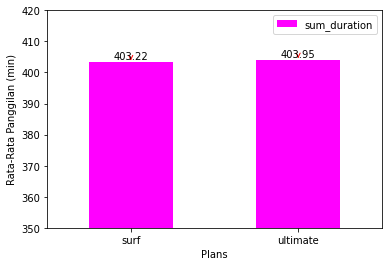

In [50]:
# Membuat pivot table untuk merangkum rata-rata dataset durasi panggilan berdasarkan jenis paket yang digunakan
package_call = pd.pivot_table(user_usage, index='plan', values='sum_duration', aggfunc='mean')

# Membuat diagram batang dari pivot table
plt.figure(figsize=(7, 5))
ax = package_call.plot(kind='bar', rot=0, color = 'magenta')

# Menentukan batas limit sumbu-y
plt.ylim(350, 420)

# Mendefinisikan label sumbu-x dan sumbu-y
plt.xlabel('Plans')
plt.ylabel('Rata-Rata Panggilan (min)')

# Menambahkan anotasi pada bar chart
for i, val in enumerate(package_call['sum_duration']):
    ax.annotate(f'{val:.2f}', xy=(i, val), xytext=(i, val + 1),
                ha='center', fontsize=10,
                arrowprops=dict(arrowstyle='->', lw=1, color='red'))

# Menampilkan bar chart
plt.show()

Dari grafik diatas terlihat bahwa pengguna `Paket Ultimate` memiliki durasi panggilan pengguna per bulan yang `sedikit lebih tinggi` dari pengguna `Paket Surf` dengan besar masing-masing rata-rata durasi `403.95 menit (Ultimate)` dan `403.22 menit (Surf)`.



Selanjutnya kita akan melihat distribusi durasi panggilan pengguna per bulan per paketnya menggunagan grafik histogram seperti berikut:

In [51]:
# mengelompokan jenis paket untuk kategori 'min_per_call' untuk jenis paket `surf` dan `ultimate`
surf = user_usage[user_usage['plan'] == 'surf']
ultimate = user_usage[user_usage['plan'] == 'ultimate']

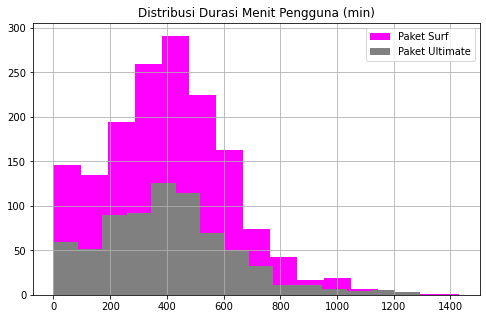

In [52]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
# membandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. 
# kita akan membuat sebuah histogram.

# membuat histogram dari paket `surf` dan paket 'ultimate'
surf['sum_duration'].hist(bins=15, label = 'Paket Surf',figsize=(8,5), color = 'magenta')
ultimate['sum_duration'].hist(bins=15, label = 'Paket Ultimate',color = 'grey')

# mendefinisikan title histogram
plt.title('Distribusi Durasi Menit Pengguna (min)')

# mendefinisikan letak legend
plt.legend(loc='upper right')

# menampilkan histogram chart
plt.show()

Dari kedua histogram tersebut menunjukan bahwa:

1. Untuk `Paket Surf` memiliki distribusi data yang tersebar pada kisaran antara `200 hingga 600 menit` dengan puncak berada pada kisaran `400 menit`.

2. Untuk `Paket Ultimate` memiliki distribusi data yang tersebar pada kisaran antara `180 hingga 500 menit` dengan puncak berada pada kisaran `300 menit`.

3. Pemakaian fitur panggilan untuk `paket surf lebih sering digunakan daripada paket ultimate`.

In [53]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
# menghitung rata-rata dan varians dari durasi panggilan bulanan

# menghitung rata-rata 
mean_surf_calls = surf['sum_duration'].mean()
mean_ultimate_calls = ultimate['sum_duration'].mean()

# menampilkan output
print('Rata-rata Durasi Panggilan Pengguna Paket Surf\t   :',f'{mean_surf_calls:.2f}','menit')
print('Rata-rata Durasi Panggilan Pengguna Paket Ultimate :',f'{mean_ultimate_calls:.2f}','menit')

Rata-rata Durasi Panggilan Pengguna Paket Surf	   : 403.22 menit
Rata-rata Durasi Panggilan Pengguna Paket Ultimate : 403.95 menit


In [54]:
# menghitung varians
varians_surf_calls = np.var(surf[['sum_duration']])
varians_ultimate_calls = np.var(ultimate[['sum_duration']])

# ekstraksi value dari varians
tmp_surf = varians_surf_calls['sum_duration']
tmp_ultimate = varians_ultimate_calls['sum_duration']

# menampilkan output
print('Varians Durasi Panggilan Pengguna Paket Surf\t :',f'{tmp_surf:.2f}','menit kuadrat')
print('Varians Durasi Panggilan Pengguna Paket Ultimate :',f'{tmp_ultimate:.2f}','menit kuadrat')

Varians Durasi Panggilan Pengguna Paket Surf	 : 49537.46 menit kuadrat
Varians Durasi Panggilan Pengguna Paket Ultimate : 52190.86 menit kuadrat


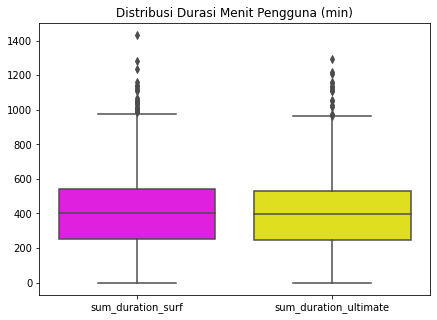

In [55]:
# membuat grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan

# Menggabungkan dua dataframe 'surf' dan 'ultimate' ke dalam satu dataframe menggunakan metode join
merging_package = surf.join(ultimate, how='outer', lsuffix='_surf', rsuffix='_ultimate')

# Membuat palet warna khusus dengan warna magenta dan kuning
colors = ["magenta", "yellow"]

# Membuat boxplot untuk durasi panggilan bulanan dengan palet warna yang telah ditentukan
plt.figure(figsize=(7, 5))
sns.boxplot(data=merging_package[['sum_duration_surf', 'sum_duration_ultimate']], palette=colors)

# Mendefinisikan judul boxplot
plt.title('Distribusi Durasi Menit Pengguna (min)')

# Menampilkan boxplot
plt.show()

Dari analisis rata-rata, `varians dan visualisasi boxplot` untuk masing-masing paket data terlihat bahwa perilaku pengguna terhadap `durasi panggilan` pada `Paket Surf memiliki perilaku yang hampir sama dengan prilaku Paket Ultimate` namun `perilaku Paket Surf lebih mengungguli daripada Paket Ultimate`.

### Pesan/SMS

<Figure size 504x360 with 0 Axes>

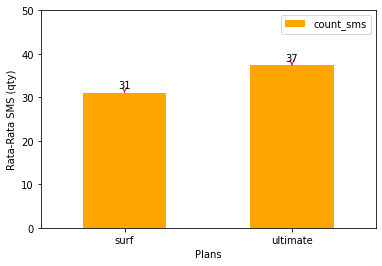

In [56]:
# Membuat pivot table untuk merangkum rata-rata dataset jumlah SMS berdasarkan jenis paket yang digunakan
package_sms = pd.pivot_table(user_usage, index='plan', values='count_sms', aggfunc='mean')

# Membuat bar chart dari pivot table dengan warna yang sesuai
plt.figure(figsize=(7, 5))
ax = package_sms.plot(kind='bar', rot=0, color='orange')

# Menentukan batas limit sumbu-y
plt.ylim(0, 50)

# Mendefinisikan label sumbu-x dan sumbu-y
plt.xlabel('Plans')
plt.ylabel('Rata-Rata SMS (qty)')

# Menambahkan anotasi pada bar chart
for i, val in enumerate(package_sms['count_sms']):
    ax.annotate(f'{val:.0f}', xy=(i, val), xytext=(i, val + 1),
                ha='center', fontsize=10,
                arrowprops=dict(arrowstyle='->', lw=1, color='red'))

# Menampilkan bar chart
plt.show()

Dari grafik diatas terlihat bahwa pengguna `Paket Ultimate memiliki jumlah sms pengguna per bulan yang lebih tinggi dari pengguna Paket Surf` dengan besar masing-masing rata-rata `jumlah sms 31 qty (Surf) dan 37 qty (Ultimate)`.



Selanjutnya kita akan melihat distribusi jumlah sms pengguna per bulan per paketnya menggunagan grafik histogram seperti berikut:

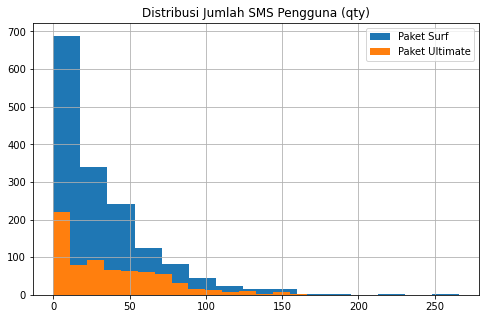

In [57]:
# membandingkan jumlah sms yang dibutuhkan pengguna tiap paket per bulannya. 
# kita akan membuat sebuah histogram.

# membuat histogram dari paket `surf` dan paket 'ultimate'
surf['count_sms'].hist(bins=15, label = 'Paket Surf',figsize=(8,5))
ultimate['count_sms'].hist(bins=15, label = 'Paket Ultimate')

# mendefinisikan title histogram
plt.title('Distribusi Jumlah SMS Pengguna (qty)')

# mendefinisikan letak legend
plt.legend(loc='upper right')

# menampilkan histogram chart
plt.show()

Dari kedua histogram tersebut menunjukan bahwa:

1. Untuk Paket Surf dan Paket Ultimate memiliki distribusi jumlah sms yang tersebar pada kisaran antara `0 hingga 30 qty` dengan puncak berada pada `kisaran 5 qty`.

2. Kedua histogram menunjukan bahwa tidak banyak pengguna yang sering menggunakan SMS dimana grafik landai ke kanan.

3. Pemakaian fitur sms untuk `paket surf lebih sering digunakan daripada paket ultimate`.

In [58]:
# menghitung rata-rata dan varians dari jumlah sms bulanan

# menghitung rata-rata 
mean_surf_sms = surf['count_sms'].mean()
mean_ultimate_sms = ultimate['count_sms'].mean()

# menampilkan output
print('Rata-rata SMS Pengguna Paket Surf     :',f'{mean_surf_sms:.2f}','sms')
print('Rata-rata SMS Pengguna Paket Ultimate :',f'{mean_ultimate_sms:.2f}','sms')

Rata-rata SMS Pengguna Paket Surf     : 31.04 sms
Rata-rata SMS Pengguna Paket Ultimate : 37.34 sms


In [59]:
# menghitung varians
varians_surf_sms = np.var(surf[['count_sms']])
varians_ultimate_sms = np.var(ultimate[['count_sms']])

# ekstraksi value dari varians
tmp_surf = varians_surf_sms['count_sms']
tmp_ultimate = varians_ultimate_sms['count_sms']

# menampilkan output
print('Varians SMS Pengguna Paket Surf     :',f'{tmp_surf:.2f}','qty kuadrat')
print('Varians SMS Pengguna Paket Ultimate :',f'{tmp_ultimate:.2f}','qty kuadrat')

Varians SMS Pengguna Paket Surf     : 1125.40 qty kuadrat
Varians SMS Pengguna Paket Ultimate : 1208.16 qty kuadrat


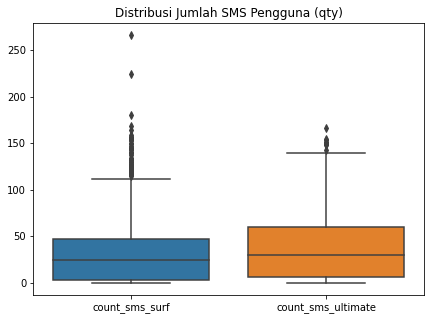

In [60]:
# membuat grafik boxplot untuk memvisualisasikan distribusi jumlah sms bulanan

# menampilkan boxplot jumlah sms berdasarkan paket-paketnya
plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['count_sms_surf','count_sms_ultimate']])

# mendefinisikan title boxplot
plt.title('Distribusi Jumlah SMS Pengguna (qty)')

# menampilkan boxplot
plt.show()

Dari analisis rata-rata, varians dan visualisasi boxplot untuk masing-masing paket data terlihat bahwa perilaku pengguna terhadap jumlah sms pada `Paket Surf memiliki perilaku yang berbeda dengan perilaku Paket Ultimate` dimana distribusi datanya berada ditempat yang berbeda. `Paket Ultimate memiliki nilai yang lebih tinggi jika dibandingkan dengan Paket Surf`.

### Internet

<Figure size 504x360 with 0 Axes>

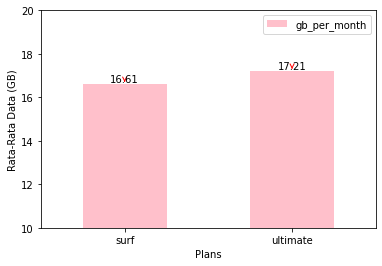

In [61]:
# Membuat pivot table untuk merangkum rata-rata dataset jumlah data berdasarkan jenis paket yang digunakan
package_internet = pd.pivot_table(user_usage, index='plan', values='gb_per_month', aggfunc='mean')

# Membuat bar chart dari pivot table dengan warna yang sesuai
plt.figure(figsize=(7, 5))
ax = package_internet.plot(kind='bar', rot=0, color='pink')

# Menentukan batas limit sumbu-y
plt.ylim(10, 20)

# Mendefinisikan label sumbu-x dan sumbu-y
plt.xlabel('Plans')
plt.ylabel('Rata-Rata Data (GB)')

# Menambahkan anotasi pada bar chart
for i, val in enumerate(package_internet['gb_per_month']):
    ax.annotate(f'{val:.2f}', xy=(i, val), xytext=(i, val + 0.1),
                ha='center', fontsize=10,
                arrowprops=dict(arrowstyle='->', lw=1, color='red'))

# Menampilkan bar chart
plt.show()

Dari grafik diatas terlihat bahwa pengguna `Paket Ultimate memiliki jumlah data internet pengguna per bulan yang sedikit lebih tinggi dari pengguna Paket Surf` dengan besar masing-masing rata-rata jumlah data internet `16.61 Gb (Surf) dan 17.21 Gb (Ultimate)`.

Selanjutnya kita akan melihat distribusi jumlah data internet pengguna per bulan per paketnya menggunagan grafik histogram seperti berikut:



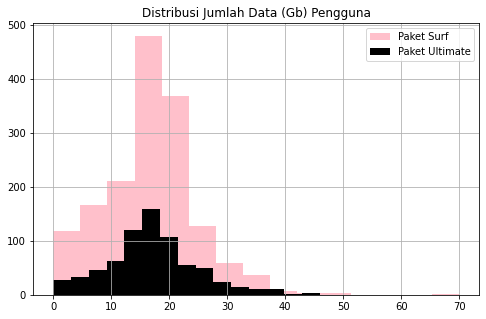

In [62]:
# membandingkan jumlah data yang dibutuhkan pengguna tiap paket per bulannya. 
# kita akan membuat sebuah histogram.

# membuat histogram dari paket `surf` dan paket 'ultimate'
surf['gb_per_month'].hist(bins=15, label = 'Paket Surf', figsize=(8,5), color = 'pink')
ultimate['gb_per_month'].hist(bins=15, label = 'Paket Ultimate', color = 'black')

# mendefinisikan title histogram
plt.title('Distribusi Jumlah Data (Gb) Pengguna')

# mendefinisikan letak legend
plt.legend(loc='upper right')

# menampilkan histogram chart
plt.show()

Dari kedua histogram tersebut menunjukan bahwa:

1. Untuk `Paket Surf` memiliki distribusi data yang tersebar pada kisaran antara `15 hingga 22 Gb` dengan puncak berada pada `kisaran 17 Gb`.

2. Untuk `Paket Ultimate` memiliki distribusi data yang tersebar pada kisaran antara `13 hingga 21 Gb` dengan puncak berada pada `kisaran 15 Gb`.

3. Pemakaian fitur Jumlah Data Internet untuk `paket surf lebih sering digunakan daripada paket ultimate`.

In [63]:
# menghitung rata-rata dan varians dari jumlah data (gb) bulanan

# menghitung rata-rata 
mean_surf_internet = surf['gb_per_month'].mean()
mean_ultimate_internet = ultimate['gb_per_month'].mean()

# menampilkan output
print('Rata-rata Jumlah Data Internet Pengguna Paket Surf     :',f'{mean_surf_internet:.2f}','gb')
print('Rata-rata Jumlah Data Internet Pengguna Paket Ultimate :',f'{mean_ultimate_internet:.2f}','gb')

Rata-rata Jumlah Data Internet Pengguna Paket Surf     : 16.61 gb
Rata-rata Jumlah Data Internet Pengguna Paket Ultimate : 17.21 gb


In [64]:
# menghitung varians
varians_surf_gb = np.var(surf[['gb_per_month']])
varians_ultimate_gb = np.var(ultimate[['gb_per_month']])

# ekstraksi value dari varians
tmp_surf = varians_surf_gb['gb_per_month']
tmp_ultimate = varians_ultimate_gb['gb_per_month']

# menampilkan output
print('Varians Jumlah Data Internet Pengguna Paket Surf     :',f'{tmp_surf:.2f}','gb kuadrat')
print('Varians Jumlah Data Internet Pengguna Paket Ultimate :',f'{tmp_ultimate:.2f}','gb kuadrat')

Varians Jumlah Data Internet Pengguna Paket Surf     : 62.36 gb kuadrat
Varians Jumlah Data Internet Pengguna Paket Ultimate : 60.07 gb kuadrat


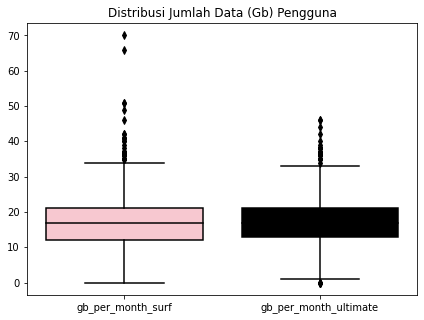

In [65]:
# membuat grafik boxplot untuk memvisualisasikan distribusi jumlah data (gb) bulanan
# menampilkan boxplot jumlah sms berdasarkan paket-paketnya

# Membuat palet warna khusus dengan warna pink dan hitam
colors = ["pink", "black"]

plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['gb_per_month_surf','gb_per_month_ultimate']], palette=colors)

# mendefinisikan title boxplot
plt.title('Distribusi Jumlah Data (Gb) Pengguna')

# menampilkan boxplot
plt.show()

Dari analisis rata-rata, varians dan visualisasi boxplot untuk masing-masing paket data terlihat bahwa perilaku pengguna terhadap `jumlah data internet pada Paket Surf memiliki perilaku yang sedikit berbeda dengan perilaku Paket Ultimate` dimana distribusi datanya berada ditempat yang sedikit berbeda. `Paket Ultimate memiliki nilai yang lebih tinggi jika dibandingkan dengan Paket Surf`.


## Pendapatan

Selanjutnya kita hitung pendapatan dari masing-masing prabayar.

<Figure size 504x360 with 0 Axes>

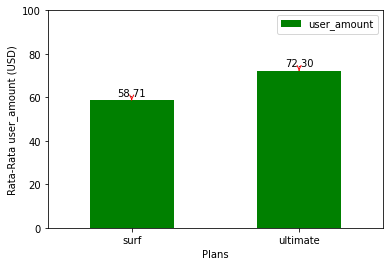

In [66]:
# Membuat pivot table untuk merangkum rata-rata dataset jumlah pendapatan berdasarkan jenis paket yang digunakan
package_amount = pd.pivot_table(user_usage, index='plan', values='user_amount', aggfunc='mean')

# Membuat bar chart dari pivot table
plt.figure(figsize=(7, 5))
ax = package_amount.plot(kind='bar', rot=0, color = 'green')

# Menentukan batas limit sumbu-y
plt.ylim(0, 100)

# Mendefinisikan label sumbu-x dan sumbu-y
plt.xlabel('Plans')
plt.ylabel('Rata-Rata user_amount (USD)')

# Menambahkan anotasi pada bar chart
for i, val in enumerate(package_amount['user_amount']):
    ax.annotate(f'{val:.2f}', xy=(i, val), xytext=(i, val + 2),
                ha='center', fontsize=10,
                arrowprops=dict(arrowstyle='->', lw=1, color='red'))

# Menampilkan bar chart
plt.show()

Dari grafik diatas terlihat bahwa pengguna `Paket Ultimate memberikan jumlah pendapatan dari pengguna per bulan yang lebih tinggi dari pengguna Paket Surf` dengan besar masing-masing rata-rata `jumlah pendapatan 58.71 USD (Surf) dan 72.30 USD (Ultimate)`.

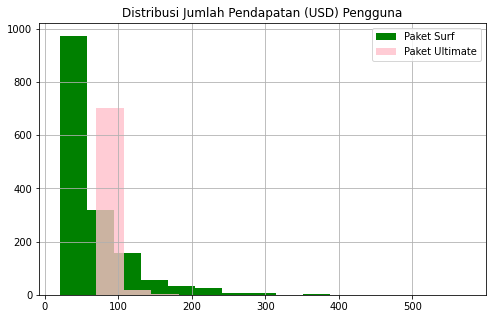

In [67]:
# membandingkan jumlah pendapatan dari pengguna tiap paket per bulannya. 
# kita akan membuat sebuah histogram.

# membuat histogram dari paket `surf` dan paket 'ultimate'
surf['user_amount'].hist(bins=15, label = 'Paket Surf',figsize=(8,5), color ='green')
ultimate['user_amount'].hist(bins=3, label = 'Paket Ultimate', alpha = 0.8, color = 'pink')

# mendefinisikan title histogram
plt.title('Distribusi Jumlah Pendapatan (USD) Pengguna')

# mendefinisikan letak legend
plt.legend(loc='upper right')

# menampilkan histogram chart
plt.show()

Dari kedua histogram tersebut menunjukan bahwa:

1. Untuk `Paket Surf` memiliki distribusi data yang tersebar pada kisaran antara 25 hingga 90 USD dengan puncak berada pada kisaran 30 USD.

2. Untuk `Paket Ultimate` memiliki distribusi data yang terpusat pada kisaran 70 USD.

3. Pemakaian Jenis `Paket untuk paket surf lebih sering digunakan daripada paket ultimate`.

4. Kedua grafik memiliki bentuk yang landai kekanan `(Positive Skew)`.

In [68]:
# menghitung rata-rata dan varians dari jumlah pendapatan dari pelanggan bulanan

# menghitung rata-rata 
mean_surf_amount = surf['user_amount'].mean()
mean_ultimate_amount = ultimate['user_amount'].mean()

# menampilkan output
print('Rata-rata Jumlah Pendapatan dari Pengguna Paket Surf     :',f'{mean_surf_amount:.2f}','USD')
print('Rata-rata Jumlah Pendapatan dari Pengguna Paket Ultimate :',f'{mean_ultimate_amount:.2f}','USD')

Rata-rata Jumlah Pendapatan dari Pengguna Paket Surf     : 58.71 USD
Rata-rata Jumlah Pendapatan dari Pengguna Paket Ultimate : 72.30 USD


In [69]:
# menghitung varians
varians_surf_amount = np.var(surf[['user_amount']])
varians_ultimate_amount = np.var(ultimate[['user_amount']])

# ekstraksi value dari varians
tmp_surf = varians_surf_amount['user_amount']
tmp_ultimate = varians_ultimate_amount['user_amount']

# menampilkan output
print('Varians Jumlah Pendapatan dari Pengguna Paket Surf     :',f'{tmp_surf:.2f}','USD kuadrat')
print('Varians Jumlah Pendapatan dari Pengguna Paket Ultimate :',f'{tmp_ultimate:.2f}','USD kuadrat')

Varians Jumlah Pendapatan dari Pengguna Paket Surf     : 2968.12 USD kuadrat
Varians Jumlah Pendapatan dari Pengguna Paket Ultimate : 128.98 USD kuadrat


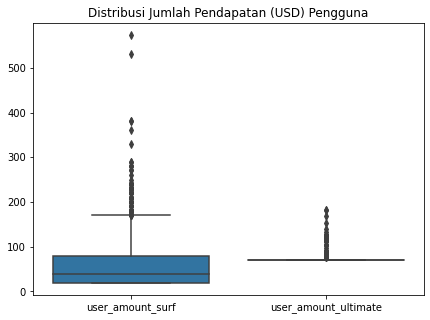

In [70]:
# membuat grafik boxplot untuk memvisualisasikan distribusi jumlah pendapatan dari pelanggan bulanan

# menampilkan boxplot jumlah sms berdasarkan paket-paketnya
plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['user_amount_surf','user_amount_ultimate']])

# mendefinisikan title boxplot
plt.title('Distribusi Jumlah Pendapatan (USD) Pengguna')

# menampilkan boxplot
plt.show()

Dari analisis rata-rata, varians dan visualisasi boxplot untuk masing-masing pendapatan dari pengguna terlihat `bahwa pendapatan bulanan dari paket surf dan paket ultimate memberikan hasil pendapatan yang berbeda`dimana pada `paket ultimate memberikan pendapatan bulanan yang lebih tinggi dibandingkan dengan pendapatan dari paket surf`.

## Menguji Hipotesis Statistik

### Pengujian Hipotesis 1: Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda

Selanjutnya kita akan menguji suatu hipotesis yang menyatakan bahwa `Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda`. Mari kita rangkum hipotesisnya sebagai berikut:

1. Hipotesis Nol: `Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Sama`
2. Hipotesis Alternatif: `Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda`

Mari kita uji menggunakan library scipy.

In [71]:
# menguji hipotesis 1:
# mendefinisikan signifikasi sebesar 5%
alpha = 0.05

# menguji apakah pendapatan pada paket `surf` dan paket `ultimate` memiliki kesamaan menggunakan `ttest_ind`
results = st.ttest_ind(surf['user_amount'],ultimate['user_amount'],equal_var=False)

# menampilkan p-value
print('p-value',results.pvalue)

# pengujian hipotesis
if results.pvalue < alpha:
    # hipotesis alternatif = "Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda" 
    print('Kita menolak hipotesis nol')
else:
    # hipotesis nol = "Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Sama"
    print('Kita tidak dapat menolak hipotesis nol')


p-value 8.382041210755051e-21
Kita menolak hipotesis nol


Dari hasil pengujian hipotesis menunjukan `'Penolakan terhadap Hipotesis Nol'` dimana `'Hipotesis Alternatif yang Disetujui'` yang berarti bahwa `"Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda"`. Hal ini sesuai dengan analisis pendapatan dari pengguna pada pembahasan sebelumnya bahwa `'Pendapatan dari Paket Ultimate Lebih Besar dari Paket Surf'`. Maka, Hipotesis 1, terbukti.

### Pengujian Hipotesis 2: Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ Berbeda dengan Pendapatan Pengguna dari Wilayah Lain

Selanjutnya kita akan menguji suatu hipotesis yang menyatakan bahwa `Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ Berbeda dengan Pendapatan Pengguna dari Wilayah Lain`. Mari kita rangkum hipotesisnya sebagai berikut:

1. Hipotesis Nol: `Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Sama`
2. Hipotesis Alternatif: `Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Berbeda`

Mari kita uji menggunakan library scipy.

In [72]:
# membuat filter pendapatan berdasarkan region 'NY-NJ' dengan region 'other'
ny_nj_amount = user_usage[user_usage['region'] == 'NY-NJ']
other_amount = user_usage[user_usage['region'] == 'other']

In [73]:
# menguji hipotesis 2:
# mendefinisikan signifikasi sebesar 5%
alpha = 0.05

# menguji apakah pendapatan pada region `NY-NJ` dan region `Other` memiliki kesamaan menggunakan `ttest_ind`
results = st.ttest_ind(ny_nj_amount['user_amount'],other_amount['user_amount'],equal_var=False)

# menampilkan p-value
print('p-value',results.pvalue)

# pengujian hipotesis
if results.pvalue < alpha:
    # hipotesis alternatif = "Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Berbeda" 
    print('Kita menolak hipotesis nol')
else:
    # hipotesis nol = "Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Sama"
    print('Kita tidak dapat menolak hipotesis nol')

p-value 0.03327457489162227
Kita menolak hipotesis nol


Dari hasil pengujian hipotesis menunjukan `'Kita tidak dapat menolak Hipotesis Nol'` dimana `'Hipotesis Alternatif yang Ditolak'` yang berarti bahwa `"Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Sama"`. Maka, Hipotesis 2 ini tidak terbukti.



## Kesimpulan Umum


Untuk menentukan paket prabayar yang lebih menguntungkan, kita melakukan analisis yang meliputi tahap persiapan data hingga analisis mendalam. Proses ini juga mencakup pengujian hipotesis. Berikut ringkasan hasil analisis:

**Tahap Persiapan Data:**

1. Data dari berbagai dataframe seperti `'calls', 'internet', 'messages', 'plans', dan 'users'` telah disiapkan untuk analisis.
2. Data dibersihkan dengan mengatasi tipe data yang tidak sesuai, mengelola nilai yang hilang, mengidentifikasi dan menghapus duplikasi, serta memperkaya data dengan memisahkan datetime menjadi kolom terpisah (tanggal, bulan, tahun).

**Tahap Analisis Perilaku Pengguna:**

Kita menganalisis perilaku pengguna berdasarkan beberapa kategori utama, seperti:

1. **Durasi Panggilan**: Paket Prabayar Surf memiliki rata-rata durasi panggilan sebesar **403.22 menit**, sedangkan Paket Prabayar Ultimate sebesar **403.95 menit**.

2. **Jumlah SMS**: Paket Prabayar Ultimate lebih unggul dengan rata-rata **37 SMS**, sedangkan Paket Prabayar Surf hanya memiliki rata-rata **31 SMS**.

3. **Penggunaan Data Internet**: Paket Prabayar Ultimate dan Paket Prabayar Surf hampir sama dalam penggunaan data internet, dengan sedikit keunggulan untuk Paket Prabayar Ultimate (**17.21 GB** vs. **16.61 GB**).

4. **Pendapatan**: Pendapatan rata-rata per bulan dari pengguna Paket Prabayar Ultimate **72.30 USD** jauh lebih tinggi daripada Paket Prabayar Surf **58.71 USD**.

**Pengujian Hipotesis**:

Kita melakukan dua pengujian hipotesis:

1. **Hipotesis Pendapatan**: Pendapatan rata-rata dari pengguna Paket Prabayar Ultimate dan Surf berbeda secara signifikan.
2. **Hipotesis Wilayah**: Pendapatan rata-rata dari pengguna di Wilayah NY-NJ dengan wilayah lain tidak berbeda secara signifikan.

**Kesimpulan**:

Berdasarkan analisis, **`Paket Prabayar Ultimate cenderung lebih menguntungkan dari segi pendapatan dan memiliki keunggulan dalam jumlah SMS`**. Meskipun terdapat perbedaan dalam durasi panggilan dan penggunaan data internet, perbedaan ini tidak signifikan. Dengan demikian, **`Paket Prabayar Ultimate menjadi pilihan yang lebih baik bagi pengguna yang mencari pendapatan lebih tinggi dan lebih banyak SMS`**.